In [4]:
import sys
sys.path.append('/Users/s2223060/Desktop/primordial_features/')
import numpy as np
import matplotlib.pyplot as plt
from ps_constructor import PowerSpectrumConstructor

In [5]:
fn = '/Users/s2223060/Desktop/primordial_features/cosmologies/power_spectrum/DESI_plin_wiggle.txt'

# Generate PK

In [6]:
#momentum array to evaluate the data on
kmin = 0.01
kmax = 0.2
dk = 0.0005
k_bins = np.arange(kmin,kmax + dk, dk) # [h/Mpc]
k_ctrs = 0.5*(k_bins[1:] + k_bins[:-1])
h = 0.676

In [7]:
omega_ny = np.pi/dk/h
print(f"The Nyquist frequency for the linear oscillations is {omega_ny} Mpc")
omega_lin = 9000 #Mpc

The Nyquist frequency for the linear oscillations is 9294.652821271577 Mpc


In [55]:
BNGC = 2
BSGC = 3
sigma_nl = 0
sigma_s = 0
a0 = 0
a1 = 0
a2 = 0
a3 = 0
a4 = 0
alpha = 1
A = 0.025
omega_lin = 9000
phi = 0
params_NGC = [BNGC, sigma_nl, sigma_s, a0, a1, a2, a3, a4, alpha]
params_SGC = [BSGC, sigma_nl, sigma_s, a0, a1, a2, a3, a4, alpha]

In [56]:
ps_model_lin_unit_test = PowerSpectrumConstructor(fn, 'lin', k_ctrs)
ps_model_lin_unit_test.h=0.676

In [57]:
pk_NGC = ps_model_lin_unit_test.Evaluate_bare(params_NGC + [A, omega_lin, phi])
pk_SGC = ps_model_lin_unit_test.Evaluate_bare(params_SGC + [A, omega_lin, phi])

Text(0, 0.5, 'k P(k) [Mpc/h]$^2$')

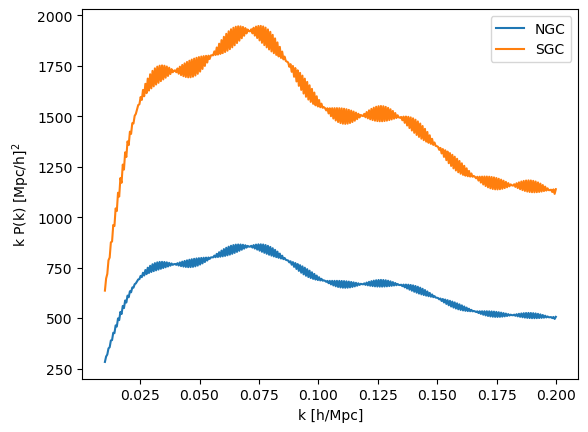

In [58]:
plt.figure()
plt.plot(k_ctrs, k_ctrs*pk_NGC, label = 'NGC')
plt.plot(k_ctrs, k_ctrs*pk_SGC, label = 'SGC')
plt.legend()
plt.xlabel(r'k [h/Mpc]')
plt.ylabel(r'k P(k) [Mpc/h]$^2$')

# Covariance matrix

In [59]:
def gaussian_covariance_matrix(k, Pk, V, delta_k, nbar):
    """
    Compute the Gaussian approximation for the covariance matrix of the power spectrum of galaxies.

    Parameters:
    k (array): Array of wavenumbers.
    Pk (array): Array of power spectrum values corresponding to the wavenumbers.
    V (float): Survey volume.
    delta_k (float): Width of the bin in k-space.

    Returns:
    cov_matrix (2D array): Covariance matrix of the power spectrum.
    """
    # Number of wavenumbers
    N = len(k)
    
    # Initialize the covariance matrix
    cov_matrix = np.zeros((N, N))
    
    # Compute the number of independent modes for each k
    Nk = V * (k**2) * delta_k / (2 * np.pi**2)
    np.fill_diagonal(cov_matrix,2 * Pk**2 / Nk + 1/nbar)
    return cov_matrix

In [60]:
nbar = 2e-4
V = (4_000)**3
NGC_COV = gaussian_covariance_matrix(k_ctrs, pk_NGC, V, dk, nbar)
SGC_COV = gaussian_covariance_matrix(k_ctrs, pk_NGC, V, dk, nbar)

In [61]:
noise_NGC = np.random.multivariate_normal(mean=np.zeros(len(k_ctrs)), cov=NGC_COV)
noise_SGC = np.random.multivariate_normal(mean=np.zeros(len(k_ctrs)), cov=SGC_COV)
pk_NGC += noise_NGC
pk_SGC += noise_SGC

Text(0, 0.5, 'k P(k) [Mpc/h]$^2$')

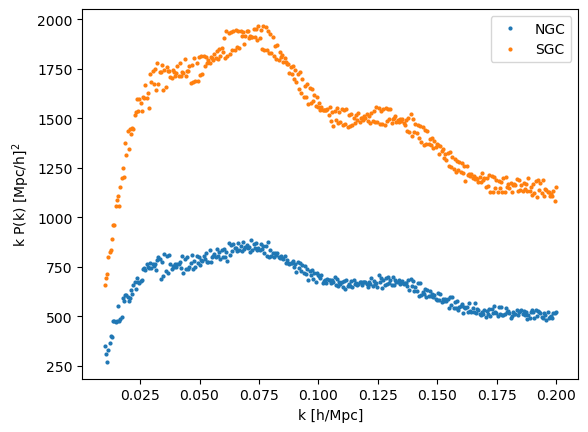

In [62]:
plt.figure()
plt.plot(k_ctrs, k_ctrs*pk_NGC, label = 'NGC', marker = "o", ls = '', markersize = 2)
plt.plot(k_ctrs, k_ctrs*pk_SGC, label = 'SGC', marker = "o", ls = '', markersize = 2)
plt.legend()
plt.xlabel(r'k [h/Mpc]')
plt.ylabel(r'k P(k) [Mpc/h]$^2$')

In [64]:
final_cov = np.zeros((2*len(k_ctrs),2*len(k_ctrs)))
final_cov[0:len(k_ctrs),0:len(k_ctrs)] = NGC_COV
final_cov[len(k_ctrs):,len(k_ctrs):] = SGC_COV

In [66]:
final_DATA = np.hstack((pk_NGC,pk_SGC))

In [67]:
np.savetxt('data_unit0_omegalin_9000_dk_0.0005.txt',final_DATA)
np.savetxt('k_unit0_omegalin_9000_dk_0.0005.txt',k_ctrs)
np.savetxt('COV_unit0_omegalin_9000_dk_0.0005.txt',final_cov)